**このJupter notebookは、立教大学大学院人工知能科学研究科内での利用に限ります。**

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from scipy import stats
#from scipy.optimize import curve_fit
from pandas import Series, DataFrame
%matplotlib inline

In [3]:
%whos

Variable    Type      Data/Info
-------------------------------
DataFrame   type      <class 'pandas.core.frame.DataFrame'>
Series      type      <class 'pandas.core.series.Series'>
np          module    <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
pd          module    <module 'pandas' from 'c:<...>es\\pandas\\__init__.py'>
plt         module    <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>


# Pandas の ABC

データ分析や機械学習における前処理を簡易に行うため、あるいはデータベースを扱うためのツールとして、Pandas を用いる。

## Series 

Numpy の array をベースにした１次元の数値列を扱うためのデータ型。
自動的に 0, 1, 2, .. の index がつく。

In [4]:
x = pd.Series([1.2, 3.0, 4.5, 102.3]) 
print("index  number")
print(x)

index  number
0      1.2
1      3.0
2      4.5
3    102.3
dtype: float64


index を文字列にすることもできる。

In [5]:
xx = pd.Series([1.2, 3.0, 4.5, 102.3], index=['sun', 'mon', 'tue', 'wed']) 
print(xx)
print(xx.values)  ## 値を取り出す
print(xx.index)   ## index を取り出す

sun      1.2
mon      3.0
tue      4.5
wed    102.3
dtype: float64
[  1.2   3.    4.5 102.3]
Index(['sun', 'mon', 'tue', 'wed'], dtype='object')


## DataFrame

2次元の数値テーブルを扱うためのデータ型（オブジェクト）。

In [6]:
## dictionary 型で、データを用意する。
data = {'Name':['Suzuki', 'Viciedo', 'Itoi', 'Oshima', 'Sakamoto'],
        'Team':['C', 'D', 'T', 'D', 'G'],
        'Average':[0.335, 0.315, 0.314, 0.312, 0.312],
        'HR':[28, 18, 5, 3, 40]}
print(type(data))

## DataFrame に入れる
df = DataFrame(data)
print(df)

<class 'dict'>
       Name Team  Average  HR
0    Suzuki    C    0.335  28
1   Viciedo    D    0.315  18
2      Itoi    T    0.314   5
3    Oshima    D    0.312   3
4  Sakamoto    G    0.312  40


In [7]:
## Jupyter 環境で df と直接打つと、整形されたテーブルが出力される。
df

,Name,Team,Average,HR
0,Suzuki,C,0.335,28
1,Viciedo,D,0.315,18
2,Itoi,T,0.314,5
3,Oshima,D,0.312,3
4,Sakamoto,G,0.312,40


In [8]:
## 特定の列を取り出す
df.Average

0    0.335
1    0.315
2    0.314
3    0.312
4    0.312
Name: Average, dtype: float64

In [9]:
## 特定の列を取り出す
##df['Name']
df['Average']

0    0.335
1    0.315
2    0.314
3    0.312
4    0.312
Name: Average, dtype: float64

In [10]:
## 特定の列の平均や最大を出す
print('mean(HR) = ',  df['HR'].mean())
print('max(HR) = ', df['HR'].max())

mean(HR) =  18.8
max(HR) =  40


In [11]:
df['HR'].min()

3

In [12]:
## 特定の行を取り出すため、次のようにして bool を要素に持つ Series を作る。
get_dragons = df['Team'] == "D"
df[get_dragons]
##get_dragons

,Name,Team,Average,HR
1,Viciedo,D,0.315,18
3,Oshima,D,0.312,3


In [13]:
df['Name'] == "Sakamoto"

0    False
1    False
2    False
3    False
4     True
Name: Name, dtype: bool

In [14]:
## フィルターとして作用
df[df['Name'] == "Sakamoto"]
## df[df['Team'] == "C"]
## df[get_dragons]

,Name,Team,Average,HR
4,Sakamoto,G,0.312,40


In [15]:
## 条件を複数指定する場合、isin(リスト) を用いる
df[df['Name'].isin(["Sakamoto", "Suzuki"])]

,Name,Team,Average,HR
0,Suzuki,C,0.335,28
4,Sakamoto,G,0.312,40


In [16]:
##　別の表(データ)を用意(盗塁の情報)して、df2 とする
data2 = {'Name':['Suzuki', 'Sakamoto', 'Yamada'],
           'Team':['C', 'G', 'S'],
        'StolenBase':[25, 5, 33]}
df2 = DataFrame(data2)
df2

,Name,Team,StolenBase
0,Suzuki,C,25
1,Sakamoto,G,5
2,Yamada,S,33


In [17]:
df

,Name,Team,Average,HR
0,Suzuki,C,0.335,28
1,Viciedo,D,0.315,18
2,Itoi,T,0.314,5
3,Oshima,D,0.312,3
4,Sakamoto,G,0.312,40


In [18]:
pd.merge(df, df2, on = ["Team"])

,Name_x,Team,Average,HR,Name_y,StolenBase
0,Suzuki,C,0.335,28,Suzuki,25
1,Sakamoto,G,0.312,40,Sakamoto,5


In [19]:
## 内部結合　inner join (２つのテーブルの両方にキーが存在する行を取り出して、結合)
## キーの指定は on で行う
pd.merge(df, df２, on = ["Name"])
#pd.merge(df, df2, on = "Team")

,Name,Team_x,Average,HR,Team_y,StolenBase
0,Suzuki,C,0.335,28,C,25
1,Sakamoto,G,0.312,40,G,5


In [20]:
## 全結合　full join
pd.merge(df, df2, on = ["Name"], how = "outer")

,Name,Team_x,Average,HR,Team_y,StolenBase
0,Suzuki,C,0.335,28.0,C,25.0
1,Viciedo,D,0.315,18.0,NaN,NaN
2,Itoi,T,0.314,5.0,NaN,NaN
3,Oshima,D,0.312,3.0,NaN,NaN
4,Sakamoto,G,0.312,40.0,G,5.0
5,Yamada,NaN,NaN,NaN,S,33.0


In [21]:
## 集計 : チーム毎に HR 数の平均を出す
df.groupby('Team')['HR'].mean()

Team
C    28.0
D    10.5
G    40.0
T     5.0
Name: HR, dtype: float64

In [28]:
df.groupby('Team')['HR'].mean()

Team
C    28.0
D    10.5
G    40.0
T     5.0
Name: HR, dtype: float64

## Plot



<Axes: >

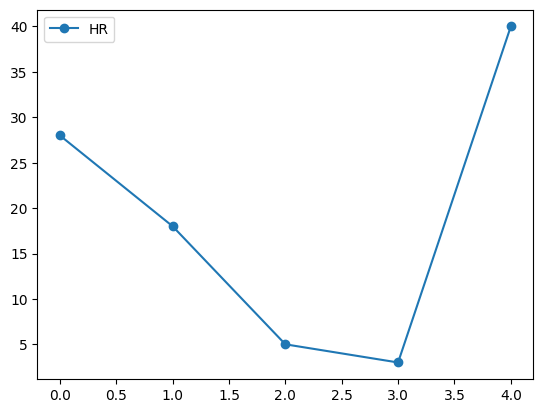

In [23]:
## plot.line() で、横軸 index として、数値データが折れ線クラフになる
df.plot.line(y="HR", marker='o')


<Axes: xlabel='Average', ylabel='HR'>

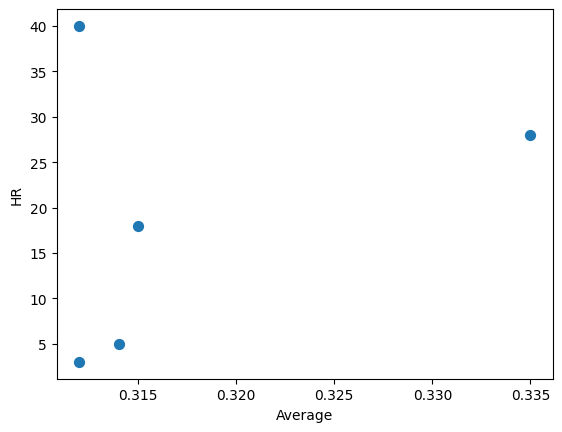

In [24]:
## 散布図 (scatter plot)
df.plot.scatter(x="Average", y="HR", s=50)

# Market Basket 分析

マーケットバスケット分析とは、商品Aを購入した客は商品Bを購入しやすいというような、商品購入の関連性を分析することである。
ここでは、「東京大学のデータサイエンティスト育成講座」（塚本、山田、大澤著） Chapter 9-4 を教材にして、マーケットバスケット分析を軽く体験する。

購入履歴データとして、UC Irvine Machine Learning Repository からダウンロードできる Online Retail.xlsx を使用する。

[ダウンロードサイト](https://archive.ics.uci.edu/ml/datasets/online+retail)

まずはエクセルの中身を確認し、どのようなデータなのか概要を
掴んでおく。

引用：
Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197--208, 2012

エクセルファイルを自分の Google Drive に置き、
下のセクション「Google Drive をマウント」に従って、 Online Retail.xlsx に Google Colab からアクセスできるようにする。ファイル名を Online_Retail.xlsx に変更。

In [25]:
## エクセルファイルを読み込む　（ファイル名、Online と Retail の間に、アンダースコア_があることに注意）
trans = pd.read_excel('drive/My Drive/Colab_Files/Online_Retail.xlsx', sheet_name='Online Retail')

FileNotFoundError: [Errno 2] No such file or directory: 'drive/My Drive/Colab_Files/Online_Retail.xlsx'

あるいは、直接、UCI のサーバーにアクセスする方法でも良い。（ネット越しで時間がかかるかもしれない）

In [26]:
trans = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx', sheet_name="Online Retail")

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
trans.head(15)
          

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,5
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,5
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,5
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,5
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,5


In [ ]:
## Cancel というカラムを追加する。InvoiceNo の最初の１文字で分類できる
## 5: 普通
## A: 不明
## C: キャンセル
trans['Cancel'] = trans.InvoiceNo.map(lambda x: str(x)[0])
trans.groupby('Cancel').size()

Cancel
5    532618
A         3
C      9288
dtype: int64

In [ ]:
## 通常の取引（Cencel=5)で、CustomerID があるレコードだけの trans2 をつくる
trans2 = trans[(trans.Cancel == "5") & (trans.CustomerID.notnull())]
trans2.groupby('CustomerID').size()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    756
18287.0     70
Length: 4339, dtype: int64

In [ ]:
trans2.groupby('Country').size().head(10)

Country
Australia          1185
Austria             398
Bahrain              17
Belgium            2031
Brazil               32
Canada              151
Channel Islands     748
Cyprus              614
Czech Republic       25
Denmark             380
dtype: int64

In [ ]:
## 国ごとに件数を集計し、上位５個を示す
trans2['Country'].value_counts().head(5)

United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Name: Country, dtype: int64

In [ ]:
trans2.groupby('StockCode').size()

StockCode
10002      49
10080      21
10120      30
10125      64
10133     124
         ... 
C2        133
DOT        16
M         290
PADS        4
POST     1099
Length: 3665, dtype: int64

In [ ]:
## StockCode (商品コード）　ごとに件数を集計し、上位１０個を示す
trans2['StockCode'].value_counts().head(5)

85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
Name: StockCode, dtype: int64

２つの商品（ここでは 85123A と 85099B を例にとる）が併売された InvoiceNo の数（バスケットの数）あるいは全体に占める割合を **支持度 support** という。

In [ ]:
## InvoiceNo を集合として（重複のない InvoiceNo の集合） set で取り出す。
trans_all = set(trans2.InvoiceNo)
print("all: ", len(trans_all))

## 商品 85123A を購入した Invoice を trans_a とする
trans_a = set(trans2[trans2['StockCode']=='85123A'].InvoiceNo)
print("85123A: ", len(trans_a))

## 商品 85099B を購入した Invoice を trans_b とする
trans_b = set(trans2[trans2['StockCode']=='85099B'].InvoiceNo)
print("85099B: ", len(trans_b))

## 両商品を購入した Invoice を trans_ab とする
trans_ab = trans_a & trans_b
print("85123A & 85099B: ", len(trans_ab))


all:  18536
85123A:  1978
85099B:  1600
85123A & 85099B:  252


リフト値 (lift) 

全体のバスケットに占める商品Bの購買率と、
商品A を購買したときの商品Bの購買率の比が、リフト値。
リフト値が 1 よりも大きければ、**併売しやすい**ことを示す。

In [ ]:
## 全体のバスケットに占める商品Bの購買率
r1 = len(trans_b)/len(trans_all)

## 商品A を購買したときの商品Bの購買率
r2 = len(trans_ab)/len(trans_a)

## リフト値
lift = r2/r1
print("lift = ", lift)

lift =  1.4759453993933265


In [ ]:
%whos

Variable      Type         Data/Info
------------------------------------
DataFrame     type         <class 'pandas.core.frame.DataFrame'>
Series        type         <class 'pandas.core.series.Series'>
data          dict         n=4
data2         dict         n=3
df            DataFrame           Name Team  Average<...>akamoto    G    0.312  40
df2           DataFrame           Name Team  StolenB<...>  Yamada    S          33
get_dragons   Series       0    False\n1     True\n2<...>\nName: Team, dtype: bool
lift          float        1.4759453993933265
np            module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd            module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt           module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
r1            float        0.08631851532153648
r2            float        0.12740141557128412
trans         DataFrame           InvoiceNo StockCod<...>[541909 rows x 9 columns]
trans2        D

# Google Drive のマウント


Google Drive をマウントすることによって、画像ファイル、データファイルなどに Google Colab からアクセスするため、自分の Google Drive を**「マウント」**する。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

自分の Google Drive に、Colab_Files （名前は任意）というフォルダを作成し、そのフォルダ内にファイルをおけば、次のように Colab からアクセスできる。

In [ ]:
%ls drive/'My Drive'/Colab_Files/